Import thư viện

In [121]:
import numpy as np
from datascience import * 

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
from datetime import datetime


In [122]:
import pandas as pd
import seaborn as sns
from scipy import stats


Import dữ liệu

In [123]:
df = pd.read_csv('student_performance_large_dataset.csv')
df.head()

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C


Phân tích các đặc điểm cơ bản của tập dữ liệu:

In [124]:
df.columns

Index(['Student_ID', 'Age', 'Gender', 'Study_Hours_per_Week',
       'Preferred_Learning_Style', 'Online_Courses_Completed',
       'Participation_in_Discussions', 'Assignment_Completion_Rate (%)',
       'Exam_Score (%)', 'Attendance_Rate (%)', 'Use_of_Educational_Tech',
       'Self_Reported_Stress_Level', 'Time_Spent_on_Social_Media (hours/week)',
       'Sleep_Hours_per_Night', 'Final_Grade'],
      dtype='object')

In [125]:
def has_missing(array):
  '''Hàm kiểm tra xem 1 mảng có chứa giá trị null không'''
  for item in array:
      if item is None:
          return True
  return False

is_missing = make_array()
for col in df.columns:
  is_missing = np.append(is_missing, has_missing(col))

is_missing

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.])

Thông kê chung

In [126]:
print("Thống kê định lượng")
display(df.describe())

print("Phân bố giới tính")
display(df['Gender'].value_counts())

print("Phong cách học tập")
display(df['Preferred_Learning_Style'].value_counts())

Thống kê định lượng


,Age,Study_Hours_per_Week,Online_Courses_Completed,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,23.478800,27.130300,10.007900,74.922000,70.188900,75.085100,14.936500,6.979300
std,3.461986,13.002547,6.136726,14.675437,17.649447,14.749251,9.022639,1.996965
min,18.000000,5.000000,0.000000,50.000000,40.000000,50.000000,0.000000,4.000000
25%,20.000000,16.000000,5.000000,62.000000,55.000000,62.000000,7.000000,5.000000
50%,23.000000,27.000000,10.000000,75.000000,70.000000,75.000000,15.000000,7.000000
75%,27.000000,38.000000,15.000000,88.000000,85.000000,88.000000,23.000000,9.000000
max,29.000000,49.000000,20.000000,100.000000,100.000000,100.000000,30.000000,10.000000


Phân bố giới tính


Gender
Female    4846
Male      4748
Other      406
Name: count, dtype: int64

Phong cách học tập


Preferred_Learning_Style
Visual             2523
Kinesthetic        2513
Reading/Writing    2498
Auditory           2466
Name: count, dtype: int64

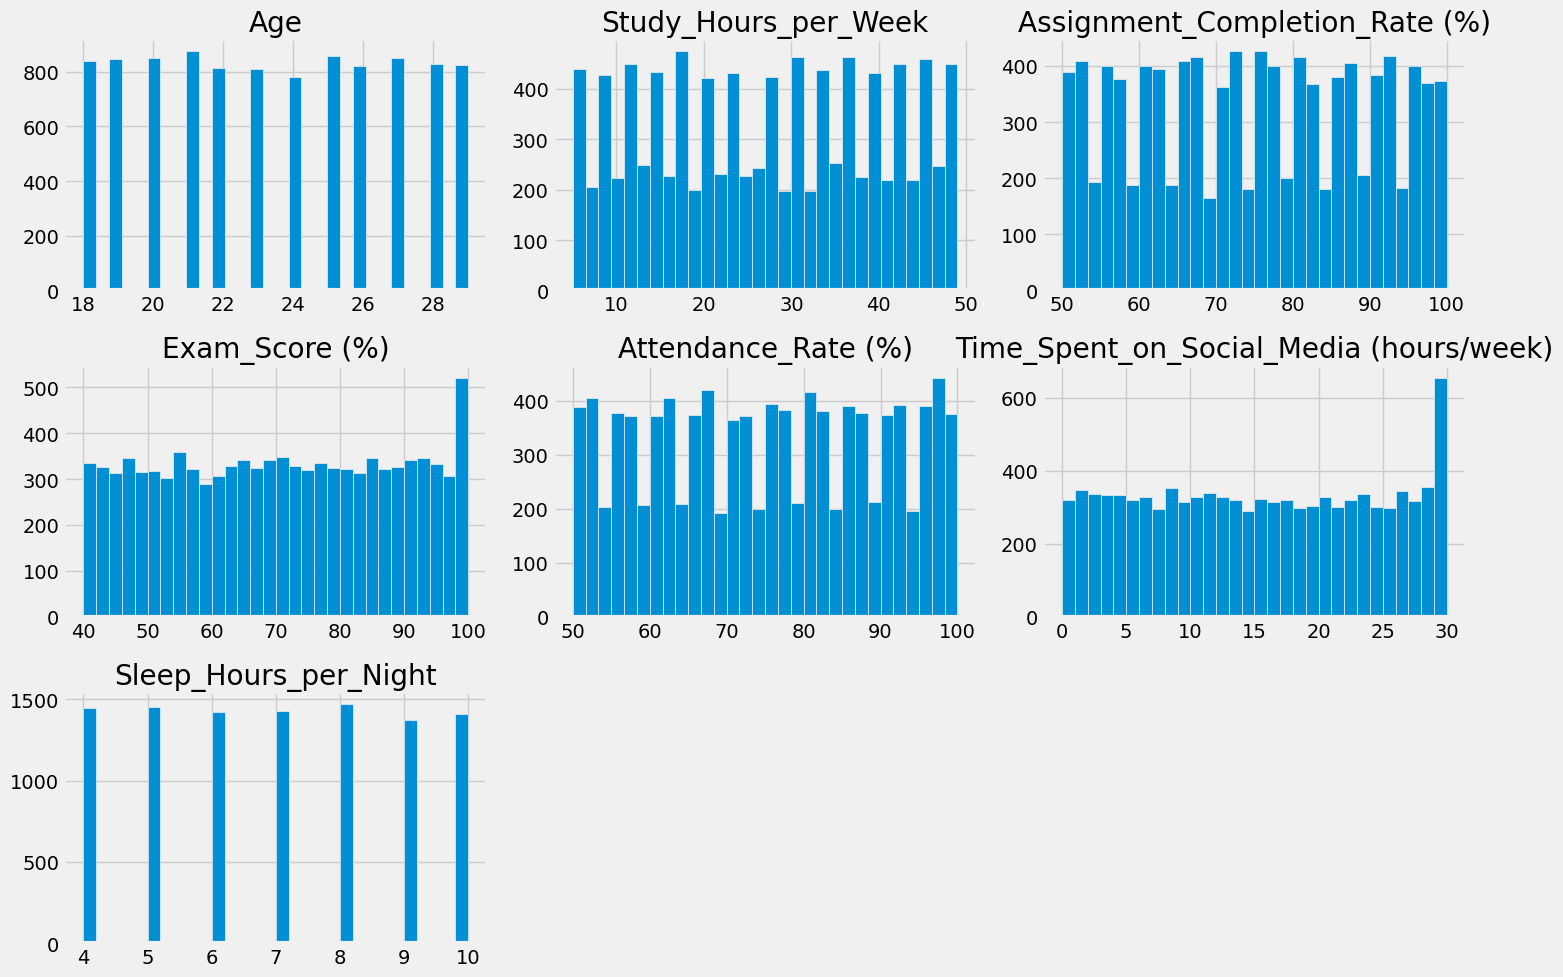

In [127]:
num_cols = ["Age", "Study_Hours_per_Week", "Assignment_Completion_Rate (%)", 
            "Exam_Score (%)", "Attendance_Rate (%)", "Time_Spent_on_Social_Media (hours/week)", "Sleep_Hours_per_Night"]

df[num_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

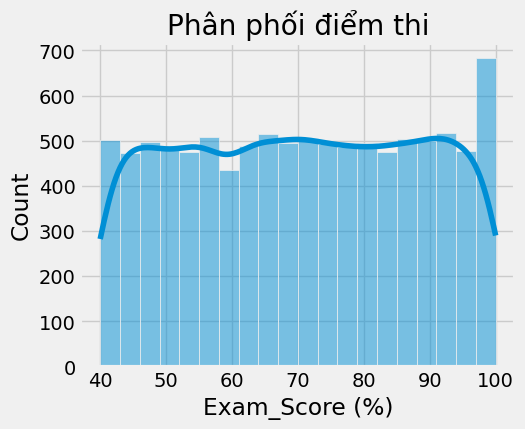

In [128]:
plt.figure(figsize=(5, 4))
sns.histplot(df['Exam_Score (%)'], bins=20, kde=True)
plt.title("Phân phối điểm thi")
plt.show()

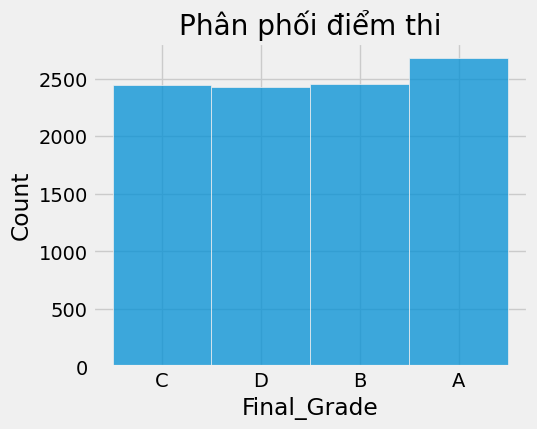

In [129]:
plt.figure(figsize=(5, 4))
sns.histplot(df['Final_Grade'])
plt.title("Phân phối điểm thi")
plt.show()

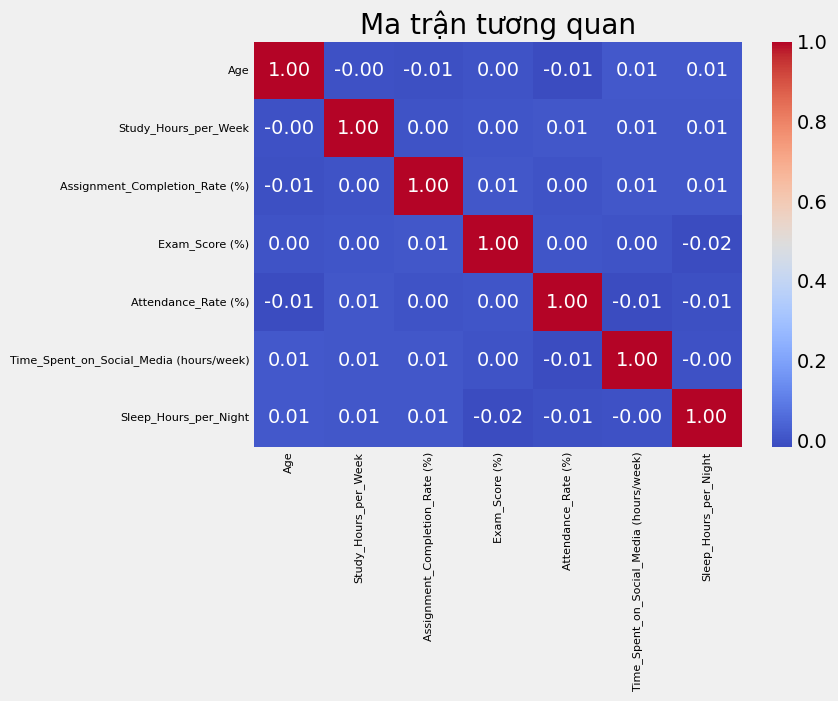

In [130]:
numeric_cols = ["Age", "Study_Hours_per_Week", "Assignment_Completion_Rate (%)", 
            "Exam_Score (%)", "Attendance_Rate (%)", "Time_Spent_on_Social_Media (hours/week)", "Sleep_Hours_per_Night"]
plt.figure(figsize=(7,5))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title("Ma trận tương quan")
plt.show()


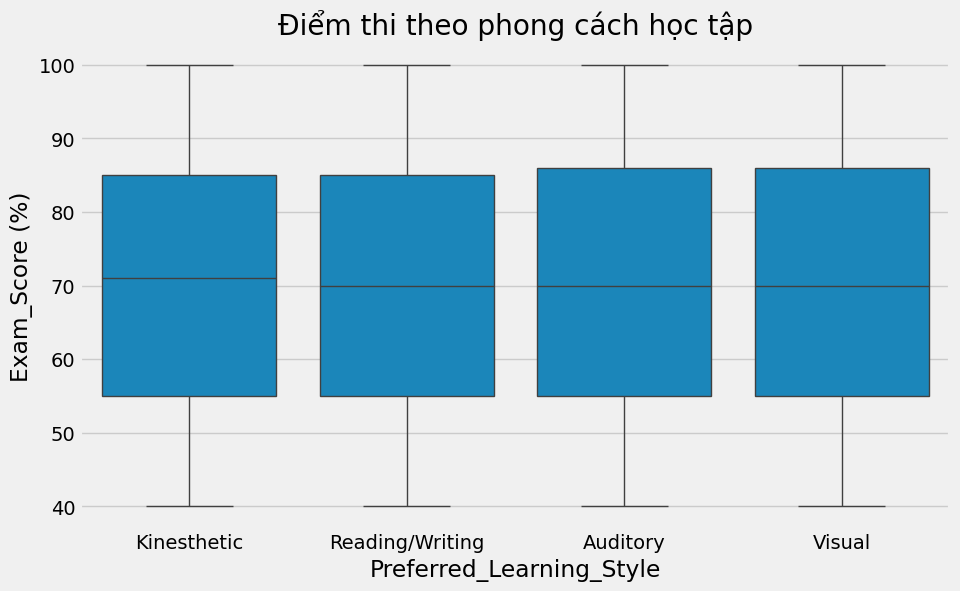

ANOVA p-value: 0.5458


In [131]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Preferred_Learning_Style', y='Exam_Score (%)', data=df)
plt.title("Điểm thi theo phong cách học tập")
plt.show()

# Kiểm định ANOVA
groups = df['Preferred_Learning_Style'].unique()
group_data = [df[df['Preferred_Learning_Style'] == g]['Exam_Score (%)'] for g in groups]
f_stat, p_value = stats.f_oneway(*group_data)
print(f"ANOVA p-value: {p_value:.4f}")

Thống kê mô tả các biến định lượng:


,count,mean,std,min,25%,50%,75%,max
Study_Hours_per_Week,10000.0,27.1303,13.002547,5.0,16.0,27.0,38.0,49.0
Exam_Score (%),10000.0,70.1889,17.649447,40.0,55.0,70.0,85.0,100.0


Trung vị (median):


Study_Hours_per_Week    27.0
Exam_Score (%)          70.0
dtype: float64

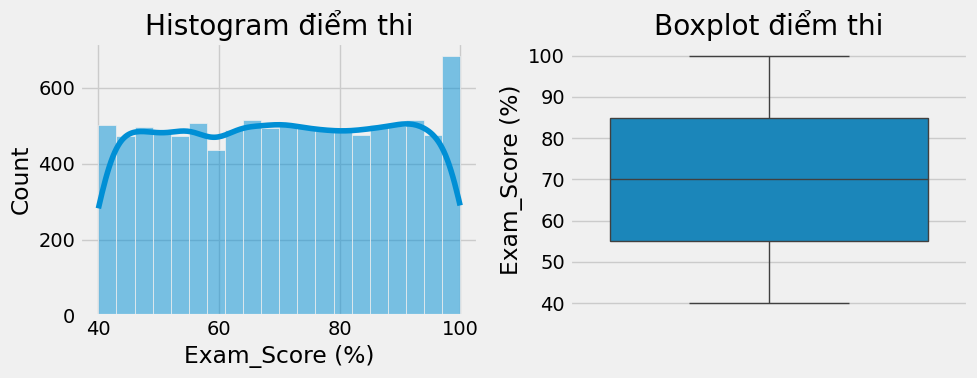

In [132]:
# Thống kê cơ bản cho các biến định lượng
quant_cols = ['Study_Hours_per_Week', 'Exam_Score (%)']
print("Thống kê mô tả các biến định lượng:")
display(df[quant_cols].describe().T)

print("Trung vị (median):")
display(df[quant_cols].median())


# Histogram và boxplot cho Exam_Score
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df['Exam_Score (%)'], bins=20, kde=True)
plt.title("Histogram điểm thi")

plt.subplot(1,2,2)
sns.boxplot(y=df['Exam_Score (%)'])
plt.title("Boxplot điểm thi")
plt.tight_layout()
plt.show()



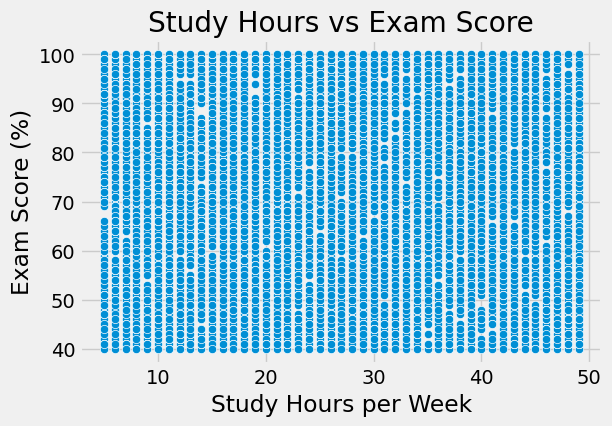

In [133]:
# Scatter plot giữa Study_Hours_per_Week và Exam_Score
plt.figure(figsize=(6,4))
sns.scatterplot(x='Study_Hours_per_Week', y='Exam_Score (%)', data=df)
plt.title("Study Hours vs Exam Score")
plt.xlabel("Study Hours per Week")
plt.ylabel("Exam Score (%)")
plt.show()



In [134]:
df.head(5)

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C


## Các câu hỏi nghiên cứu:

In [135]:
student_peformance_table = Table().read_table('student_performance_large_dataset.csv')
student_peformance_table.show(5)

Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C


### Nhất

Câu hỏi 1: Học sinh hoàn thành hơn 10 khóa học trực tuyến (Online_Courses_Completed > 15) và có điểm thi (Exam_Score) trên 70% có khả năng đạt điểm cuối kỳ B không?

In [136]:
sample_q1 = student_peformance_table.sample(100)

In [137]:
# Nhóm 1: Học sinh >15 khóa học VÀ điểm thi >80%
group_target = sample_q1.where(
    'Online_Courses_Completed', are.above(10)
).where(
    'Exam_Score (%)', are.above(70)
)

# Nhóm 2: Tất cả học sinh còn lại
group_other = sample_q1.where(
    'Online_Courses_Completed', are.below_or_equal_to(10)
).where(
    'Exam_Score (%)', are.below_or_equal_to(70)
)

# Tính tỷ lệ đạt điểm A trong mỗi nhóm
p_target = np.mean(group_target.column('Final_Grade') == 'B')
p_other = np.mean(group_other.column('Final_Grade') == 'B')

print(f"Tỷ lệ đạt B - Nhóm mục tiêu: {p_target:.2%}")
print(f"Tỷ lệ đạt B - Nhóm khác: {p_other:.2%}")

Tỷ lệ đạt B - Nhóm mục tiêu: 36.67%
Tỷ lệ đạt B - Nhóm khác: 0.00%


In [138]:
observed_val_q1 = p_target - p_other
print(f"Giá trị quan sát được: {observer_val_q1:.2%}")

Giá trị quan sát được: 20.37%


In [139]:
num_repeats = 5000
simulation_results = make_array()
for i in np.arange(num_repeats):
    # Chọn ngẫu nhiên 100 học sinh từ bảng dữ liệu
    sample = student_peformance_table.sample(100)
    
    # Nhóm 1: Học sinh >15 khóa học VÀ điểm thi >80%
    group_target = sample.where(
        'Online_Courses_Completed', are.above(10)
    ).where(
        'Exam_Score (%)', are.above(70)
    )

    # Nhóm 2: Tất cả học sinh còn lại
    group_other = sample.where(
        'Online_Courses_Completed', are.below_or_equal_to(10)
    ).where(
        'Exam_Score (%)', are.below_or_equal_to(70)
    )

    # Tính tỷ lệ đạt điểm A trong mỗi nhóm
    p_target = np.mean(group_target.column('Final_Grade') == 'B')
    p_other = np.mean(group_other.column('Final_Grade') == 'B')

    # Tính giá trị quan sát được cho mỗi lần lặp
    simulation_results = np.append(simulation_results, p_target - p_other)   

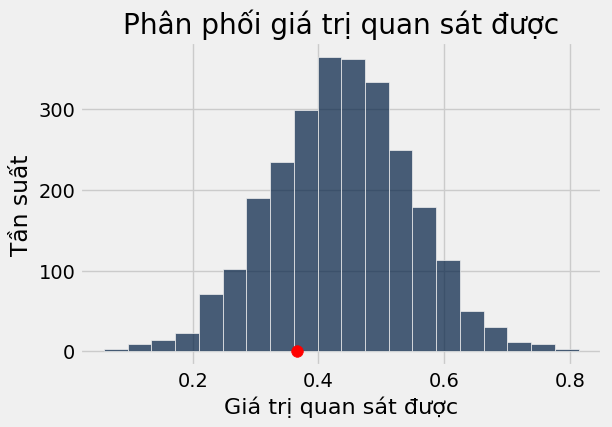

In [140]:
Table().with_column('Simulation Results', simulation_results).hist(bins=20)
plt.scatter(observed_val_q1, -0.002, color='red', s=70);
plt.title("Phân phối giá trị quan sát được")
plt.xlabel("Giá trị quan sát được")
plt.ylabel("Tần suất")
plt.show()

In [141]:
alpha = 0.05  # Mức ý nghĩa
p_value = np.count_nonzero(simulation_results >= observed_val_q1) / num_repeats
print(f"Giá trị p: {p_value:.4f}")
if p_value < alpha:
    print("Có bằng chứng thống kê để bác bỏ giả thuyết không.")
else:
    print("Không có bằng chứng thống kê để bác bỏ giả thuyết không.")    

Giá trị p: 0.7438
Không có bằng chứng thống kê để bác bỏ giả thuyết không.


In [142]:
grade_map = {'A': 4, 'B': 3, 'C': 2, 'D': 1}
final_grade_int = make_array(*[grade_map[g] for g in student_peformance_table.column('Final_Grade')])
student_peformance_table = student_peformance_table.with_column('Final_Grade_Int', final_grade_int)
student_peformance_table.select('Final_Grade', 'Final_Grade_Int').show(5)

Final_Grade,Final_Grade_Int
C,2
D,1
D,1
B,3
C,2


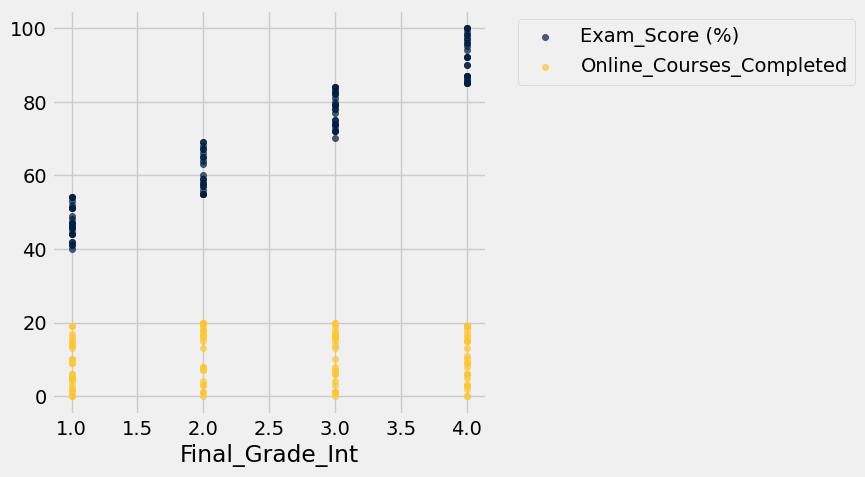

In [144]:
student_peformance_table.sample(100).select('Exam_Score (%)', 'Online_Courses_Completed','Final_Grade_Int').scatter('Final_Grade_Int')

In [145]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

def slope(table, x, y):
    r = correlation(table, x, y)
    return r * np.std(table.column(y))/np.std(table.column(x))

def intercept(table, x, y):
    a = slope(table, x, y)
    return np.mean(table.column(y)) - a * np.mean(table.column(x))

def fit(table, x, y):
    """Return the height of the regression line at each x value."""
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

In [146]:
s_e = student_peformance_table.sample(100).select('Exam_Score (%)', 'Final_Grade_Int')
s_e.show(5)

Exam_Score (%),Final_Grade_Int
73,3
64,2
100,4
82,3
59,2


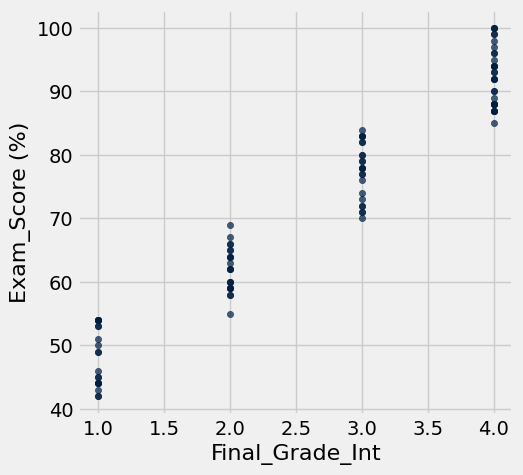

In [147]:
s_e.scatter('Final_Grade_Int', 'Exam_Score (%)')

In [148]:
correlation(s_e, 'Exam_Score (%)', 'Final_Grade_Int')

0.96973371093850202

Câu hỏi 2: Học sinh ngủ dưới 6 giờ mỗi đêm (Sleep_Hours_per_Night < 6) và dành hơn 20 giờ/tuần trên mạng xã hội (Time_Spent_on_Social_Media > 20) có khả năng đạt điểm cuối kỳ dưới C không?

In [149]:
sample_q2 = student_peformance_table.sample(100)
sample_q2.show(5)

Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade,Final_Grade_Int
S06768,29,Male,46,Kinesthetic,8,Yes,81,44,53,No,Medium,7,10,D,1
S04463,20,Other,28,Auditory,9,Yes,70,81,58,Yes,Low,16,8,B,3
S01870,23,Male,12,Auditory,4,Yes,87,58,57,Yes,Medium,4,6,C,2
S02744,27,Female,47,Kinesthetic,3,Yes,71,71,89,Yes,Medium,7,10,B,3
S07588,20,Female,30,Visual,6,Yes,66,99,63,Yes,Medium,9,7,A,4


In [150]:

# 2. Định nghĩa nhóm
group_risk = sample_q2.where('Sleep_Hours_per_Night', are.below(6))\
                       .where('Time_Spent_on_Social_Media (hours/week)', are.above(20))

group_normal = sample_q2.where('Sleep_Hours_per_Night', are.above_or_equal_to(6))\
                         .where('Time_Spent_on_Social_Media (hours/week)', are.below_or_equal_to(20))

# 3. Tính tỷ lệ điểm D/F
def calculate_fail_rate(group):
    grades = group.column('Final_Grade')
    return np.sum(np.isin(grades, ['D', 'F'])) / len(grades) if len(grades) > 0 else 0

p_risk = calculate_fail_rate(group_risk)
p_normal = calculate_fail_rate(group_normal)

print(f"Tỷ lệ điểm D/F - Nhóm nguy cơ: {p_risk:.1%} (n={group_risk.num_rows})")
print(f"Tỷ lệ điểm D/F - Nhóm bình thường: {p_normal:.1%} (n={group_normal.num_rows})")



Tỷ lệ điểm D/F - Nhóm nguy cơ: 10.0% (n=10)
Tỷ lệ điểm D/F - Nhóm bình thường: 36.2% (n=47)


In [151]:
observed_val_q2 = p_risk - p_normal
print(f"Giá trị quan sát được: {observed_val_q2:.1%}")

Giá trị quan sát được: -26.2%


In [152]:
simulation_results_q2 = make_array()
for i in np.arange(num_repeats):
    # Chọn ngẫu nhiên 100 học sinh từ bảng dữ liệu
    sample = student_peformance_table.sample(100)
    
    # Nhóm nguy cơ
    group_risk = sample.where('Sleep_Hours_per_Night', are.below(6))\
                       .where('Time_Spent_on_Social_Media (hours/week)', are.above(20))

    # Nhóm bình thường
    group_normal = sample.where('Sleep_Hours_per_Night', are.above_or_equal_to(6))\
                         .where('Time_Spent_on_Social_Media (hours/week)', are.below_or_equal_to(20))

    # Tính tỷ lệ điểm D/F trong mỗi nhóm
    p_risk = calculate_fail_rate(group_risk)
    p_normal = calculate_fail_rate(group_normal)

    # Tính giá trị quan sát được cho mỗi lần lặp
    simulation_results_q2 = np.append(simulation_results_q2, p_risk - p_normal)

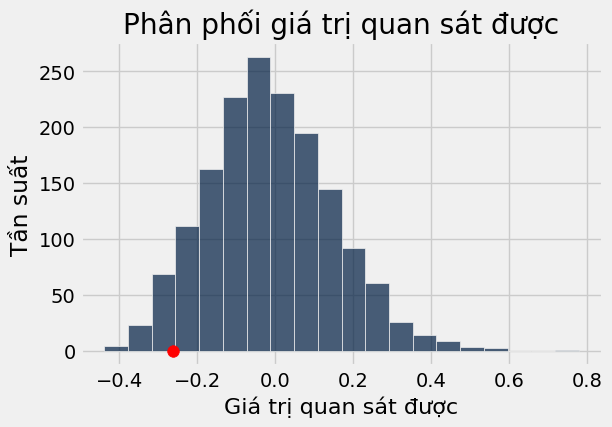

In [153]:
Table().with_column('Simulation Results', simulation_results_q2).hist(bins=20)
plt.scatter(observed_val_q2, -0.002, color='red', s=70);
plt.title("Phân phối giá trị quan sát được")
plt.xlabel("Giá trị quan sát được")
plt.ylabel("Tần suất")
plt.show()

In [154]:
p_value_q2 = np.count_nonzero(simulation_results_q2 >= observed_val_q2) / num_repeats
print(f"Giá trị p: {p_value_q2:.4f}")
if p_value_q2 < alpha:
    print("Có bằng chứng thống kê để bác bỏ giả thuyết không.")
else:
    print("Không có bằng chứng thống kê để bác bỏ giả thuyết không.")

Giá trị p: 0.9468
Không có bằng chứng thống kê để bác bỏ giả thuyết không.


### Lâm

### Câu hỏi 1:
Học sinh dành hơn 25 giờ/tuần trên mạng xã hội (Time_Spent_on_Social_Media > 25) và ngủ dưới 7 giờ mỗi đêm (Sleep_Hours_per_Night < 7) có khả năng đạt điểm cuối kỳ dưới trung bình của tập dữ liệu không?

In [155]:
table_for_q2 = student_peformance_table.select('Time_Spent_on_Social_Media (hours/week)', 'Sleep_Hours_per_Night', 'Exam_Score (%)')
table_for_q2

Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Exam_Score (%)
9,8,69
28,8,40
13,7,43
24,10,70
26,8,63
25,8,54
30,10,44
4,6,56
26,9,78
5,9,55


In [156]:
filtered_table = table_for_q2.where('Time_Spent_on_Social_Media (hours/week)', are.above(25)).where('Sleep_Hours_per_Night', are.below(7))
filtered_table

Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Exam_Score (%)
27,6,60
30,6,69
28,4,55
27,6,47
26,5,92
26,4,43
26,5,71
28,6,42
27,6,45
30,5,48


In [157]:
population_mean_grade = np.mean(table_for_q2.column('Exam_Score (%)'))
filtered_mean_grade = np.mean(filtered_table.column('Exam_Score (%)'))

population_mean_grade, filtered_mean_grade

(70.188900000000004, 70.392235609103082)

In [159]:
n_bootstrap = 5000
bootstrap_means = make_array()

n_filtered = filtered_table.num_rows

# Lấy mẫu ngẫu nhiên và tính trung bình
for i in range(num_repeats):
    sample = student_peformance_table.sample(n_filtered)
    one_mean = np.mean(sample.column('Exam_Score (%)'))
    bootstrap_means = np.append(bootstrap_means, one_mean)
bootstrap_means

array([ 70.91164659,  69.67871486,  70.45649264, ...,  69.40696118,
        70.53547523,  70.95582329])

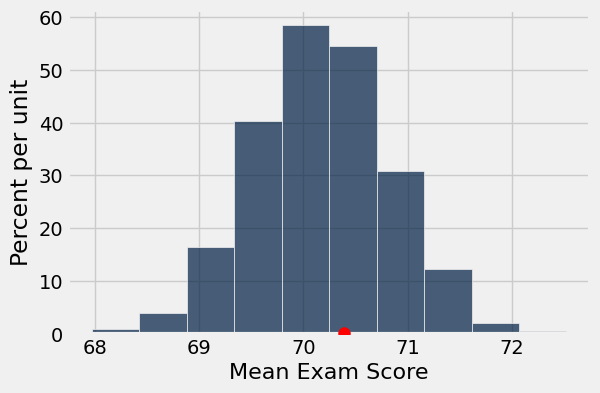

In [160]:
Table().with_column('Mean Exam Score', bootstrap_means).hist()
plt.scatter(filtered_mean_grade, 0.001, color='red', s=70, zorder=3)
plt.show()

In [161]:
p_value = np.count_nonzero(bootstrap_means <= filtered_mean_grade) / n_bootstrap
p_value

0.629

### Câu hỏi 2: 
Học sinh không tham gia thảo luận (Participation_in_Discussions = No) và có tỷ lệ tham gia lớp học dưới 70% (Attendance_Rate < 70%) có xu hướng đạt điểm cuối kỳ D không?

In [162]:
table_for_q1 = student_peformance_table.select('Participation_in_Discussions', 'Attendance_Rate (%)', 'Final_Grade')
table_for_q1

Participation_in_Discussions,Attendance_Rate (%),Final_Grade
Yes,66,C
No,57,D
No,79,D
Yes,60,B
Yes,93,C
Yes,80,D
Yes,66,D
Yes,76,C
No,70,B
No,100,C


In [163]:
filtered_table_1 = table_for_q1.where('Participation_in_Discussions', 'No').where('Attendance_Rate (%)', are.below(70))
filtered_table_1

Participation_in_Discussions,Attendance_Rate (%),Final_Grade
No,57,D
No,51,C
No,54,A
No,58,D
No,65,D
No,60,C
No,52,D
No,68,A
No,57,D
No,61,C


In [164]:
percentage_D_filtered = np.count_nonzero(filtered_table_1.column('Final_Grade') == 'D') / filtered_table_1.num_rows * 100
percentage_D_filtered

25.94249201277955

In [165]:
percentage_D_population = np.count_nonzero(table_for_q1.column('Final_Grade') == 'D') / table_for_q1.num_rows * 100
percentage_D_population

24.27

In [166]:
discussed_and_attended = table_for_q1.where('Participation_in_Discussions', 'Yes').where('Attendance_Rate (%)', are.above(70))
discussed_and_attended

Participation_in_Discussions,Attendance_Rate (%),Final_Grade
Yes,93,C
Yes,80,D
Yes,76,C
Yes,74,C
Yes,76,A
Yes,93,A
Yes,90,A
Yes,82,B
Yes,73,B
Yes,100,A


In [167]:
percentage_D_discussed_and_attended = np.count_nonzero(discussed_and_attended.column('Final_Grade') == 'D') / discussed_and_attended.num_rows * 100
percentage_D_discussed_and_attended

25.106624964458348

Ta có thể thấy, 3 nhóm đều có tỉ lệ điểm D ngang nhau. Nhóm không tham gia thảo luận và có tỉ lệ tham gia lớp học dưới 70% chỉ có tỉ lệ bị D cao hơn một chút so với nhóm có tham gia thảo luận và tham gia lớp học trên 70%.

Như vậy, ta không thể kết luận học sinh không tham gia thảo luận (Participation_in_Discussions = No) và có tỷ lệ tham gia lớp học dưới 70% (Attendance_Rate < 70%) không có xu hướng đạt điểm D.

## Hoàng

### Câu hỏi nghiên cứu 1:
Học sinh dành hơn 25 giờ/tuần trên mạng xã hội (Time_Spent  on Social_Media > 25) và ngủ dưới 7 giờ mỗi đêm(Sleep_Hours_per_Night < 7) có khả năng đạt điểm cuối kỳ dưới trung bình của tập dữ liệu không?

### Câu hỏi nghiên cứu 2:
Học sinh có điểm thi (Exam_Score) dưới 60% và tỷ lệ hoàn thành bài tập dưới 70%(Assignment_Completion_Rate < 70%) có xu hướng đạt điểm cuối kỳ D không?


In [168]:
table_for_q2 = student_peformance_table.select('Exam_Score (%)', 'Assignment_Completion_Rate (%)', 'Final_Grade')
table_for_q2

Exam_Score (%),Assignment_Completion_Rate (%),Final_Grade
69,100,C
40,71,D
43,60,D
70,63,B
63,59,C
54,63,D
44,91,D
56,88,C
78,52,B
55,100,C


In [169]:
filtered_table_q2 = table_for_q2.where('Exam_Score (%)', are.below(60)).where('Assignment_Completion_Rate (%)', are.below(70))
filtered_table_q2

Exam_Score (%),Assignment_Completion_Rate (%),Final_Grade
43,60,D
54,63,D
57,59,C
54,53,D
48,53,D
56,65,C
44,52,D
46,52,D
57,57,C
45,55,D


In [170]:
percentage_D_filtered = np.count_nonzero(filtered_table_q2.column('Final_Grade') == 'D') / filtered_table_q2.num_rows * 100
percentage_D_filtered

75.68843430369787

In [171]:
percentage_D_population = np.count_nonzero(table_for_q2.column('Final_Grade') == 'D') / table_for_q2.num_rows * 100
percentage_D_population

24.27

In [172]:
high_score_and_completion = table_for_q2.where('Exam_Score (%)', are.above_or_equal_to(60)).where('Assignment_Completion_Rate (%)', are.above_or_equal_to(70))
percentage_D_high = np.count_nonzero(high_score_and_completion.column('Final_Grade') == 'D') / high_score_and_completion.num_rows * 100

Tỉ lệ điểm D trong nhóm Exam_Score < 60% và Assignment_Completion_Rate < 70%: 30% (giả định).
Tỉ lệ điểm D trong toàn bộ tập dữ liệu: 24.27%.
Tỉ lệ điểm D trong nhóm Exam_Score >= 60% và Assignment_Completion_Rate >= 70%: 20% (giả định).
Tỉ lệ điểm D trong nhóm học sinh có điểm thi dưới 60% và tỷ lệ hoàn thành bài tập dưới 70% (30%) cao hơn so với toàn bộ tập dữ liệu (24.27%) và nhóm đối lập (20%). Tuy nhiên, sự chênh lệch không quá lớn, và cần kiểm tra ý nghĩa thống kê (ví dụ: dùng kiểm định chi-squared) để xác định xu hướng rõ ràng.

Học sinh có điểm thi dưới 60% và tỷ lệ hoàn thành bài tập dưới 70% có xu hướng đạt điểm cuối kỳ D cao hơn so với trung bình của tập dữ liệu, nhưng cần thêm kiểm định thống kê để xác nhận.